In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


# Load data
df = pd.read_csv("../input/home-data-for-ml-course/train.csv", index_col="Id")

# sanitizing the dataset from missing values
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
df = df.drop(cols_with_missing, axis=1)

# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    print(X.shape)
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

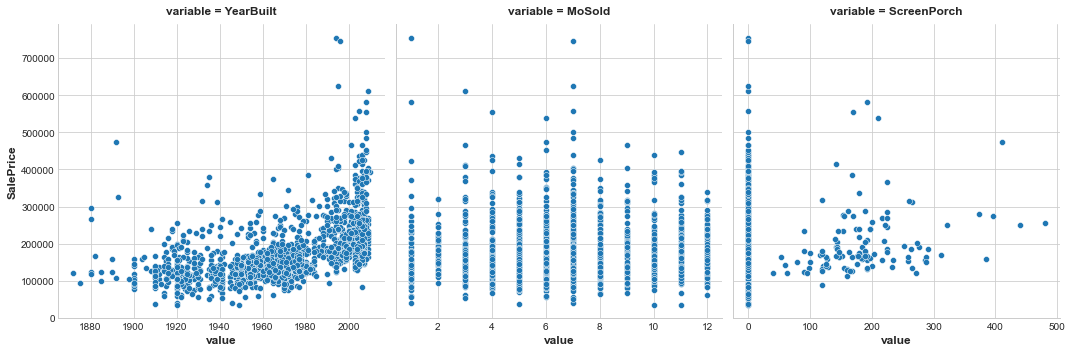

In [21]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

In [23]:
X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)

(1460, 60)


OverallQual     0.571435
Neighborhood    0.527238
GarageArea      0.499929
GrLivArea       0.432504
YearBuilt       0.409724
TotalBsmtSF     0.397164
LotArea         0.394128
GarageCars      0.363921
ExterQual       0.324668
KitchenQual     0.319854
1stFlrSF        0.282988
MSSubClass      0.281719
YearRemodAdd    0.276464
FullBath        0.267971
TotRmsAbvGrd    0.216497
Foundation      0.199036
OpenPorchSF     0.192595
HeatingQC       0.167906
Fireplaces      0.165608
Exterior2nd     0.161940
Name: MI Scores, dtype: float64
ScreenPorch     2.076403e-02
Condition1      2.036659e-02
RoofStyle       1.837956e-02
Heating         1.676514e-02
ExterCond       1.582103e-02
LotConfig       1.348550e-02
BsmtHalfBath    9.282189e-03
LowQualFinSF    6.821328e-03
RoofMatl        6.474164e-03
Functional      6.153461e-03
YrSold          3.156041e-03
BsmtFinSF2      2.980146e-03
3SsnPorch       2.657207e-03
Condition2      1.283554e-03
Street          1.553642e-04
MiscVal         6.266163e-05
Util

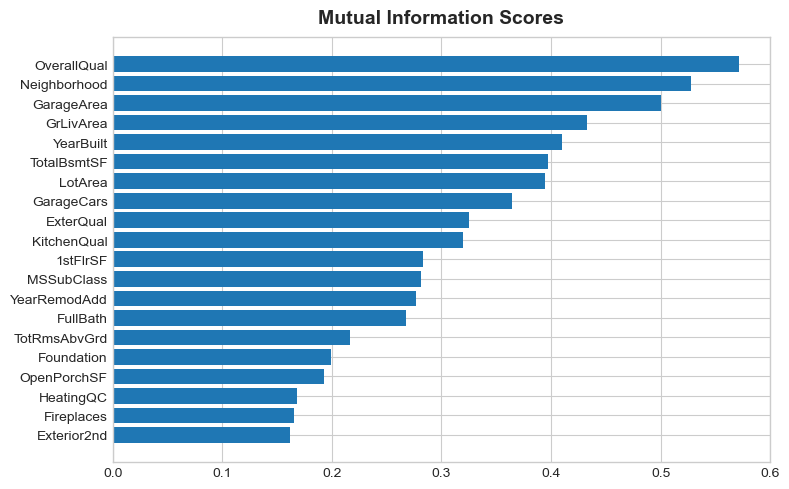

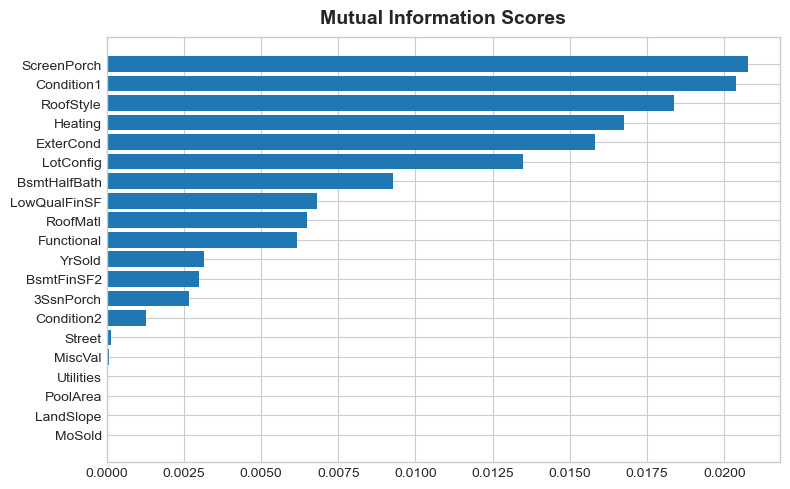

In [24]:
print(mi_scores.head(20))
print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

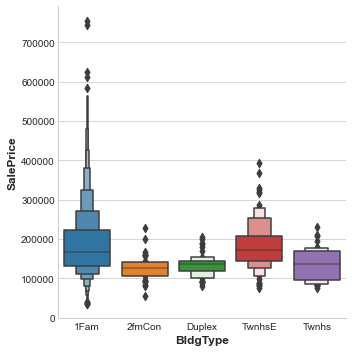

In [25]:
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen");

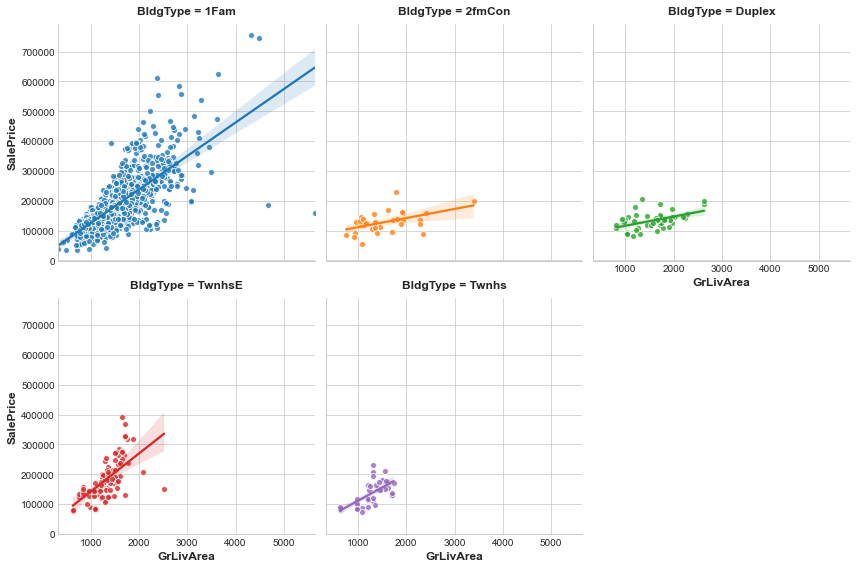

In [27]:
# YOUR CODE HERE: 
feature = "GrLivArea"
# feature = "MoSold"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

In [28]:
mi_scores.head(10)

OverallQual     0.571435
Neighborhood    0.527238
GarageArea      0.499929
GrLivArea       0.432504
YearBuilt       0.409724
TotalBsmtSF     0.397164
LotArea         0.394128
GarageCars      0.363921
ExterQual       0.324668
KitchenQual     0.319854
Name: MI Scores, dtype: float64